In [2]:
def map2feature(ftype):
    feature = ''
    if 'mind' in ftype:
        if len(feature) == 0: feature = ''.join([feature, 'D-MIND'])
        else: feature = ' '.join([feature, 'D-MIND'])
    if 'cho' in ftype:
        if len(feature) == 0: feature = ''.join([feature, 'CHO'])
        else: feature = ' '.join([feature, 'CHO'])            
    if 'coc' in ftype:
        if len(feature) == 0: feature = ''.join([feature, 'COC'])
        else: feature = ' '.join([feature, 'COC'])
    if 'rl' in ftype:
        if len(feature) == 0: feature = ''.join([feature, 'RL'])
        else: feature = ' '.join([feature, 'RL'])
    return feature

def map2denoise(dn):
    if '' == dn:
        return 'None'
    elif '_bm3d' == dn:
        return 'BM3D'
    elif '_fnlm'==dn:
        return 'FNLM'

map2feature('mind_cho_coc_rl')
map2denoise('_fnlm')

'FNLM'

In [3]:
import os.path
import numpy as np
import pandas as pd


def read_registration_error(main_folder, denoise_methods, feature_types):
    
    reg_error_df = pd.DataFrame(columns = ['Registration error (mm)', 'Features', 'Denoising'])

    # read rigid
    filename = os.path.join(main_folder, 'distance_error.csv')
    print(filename)
    if os.path.exists(filename):
        err = np.genfromtxt(filename, delimiter=',')
        features = ['NMI Rigid']*len(err)
        denoise_med = ['None']*len(err)
        s_err = pd.Series(err, name='Registration error (mm)')
        s_feature = pd.Series(features, name ='Features')
        s_denoising = pd.Series(denoise_med, name='Denoising')
        df = pd.concat([s_err, s_feature, s_denoising], axis=1)
        reg_error_df = reg_error_df.append(df, ignore_index=True)
    print(reg_error_df.head(3))
    
    for ftype in feature_types:
        for denoise in denoise_methods:
            fname = 'demons{}{}'.format(ftype, denoise)
            subfolder = os.path.join(main_folder, fname)
            filename = os.path.join(subfolder, 'distance_error.csv')
            if os.path.exists(filename):
                err = np.genfromtxt(filename, delimiter=',')
                features = [map2feature(ftype)]*len(err)
                denoise_med = [map2denoise(denoise)]*len(err)
                s_err = pd.Series(err, name='Registration error (mm)')
                s_feature = pd.Series(features, name ='Features')
                s_denoising = pd.Series(denoise_med, name='Denoising')
                df = pd.concat([s_err, s_feature, s_denoising], axis=1)
                reg_error_df = reg_error_df.append(df, ignore_index=True)
    return reg_error_df
        

In [46]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

def registration_error_boxplot(reg_error_df, image_folder = None, ystep =0.005,ymin = 0.0, ymax = 0.02, \
                               figw = 5, figh = 6,font_size = 14, legend_loc= 'upper right'):

    sns.set('paper', style="white", color_codes=True, font='Arial', font_scale = 1)

    fig, ax= plt.subplots(sharey=True, figsize=(figw, figh)) 

    ax.set(ylim=(ymin, ymax))

    flierprops = dict(markerfacecolor='0.75', markersize=2,
              linestyle='none')
    
    sns.boxplot(x="Features", y="Registration error (mm)", hue="Denoising", \
               data=reg_error_df, palette='Blues',#sns.cubehelix_palette(3, start=0.4, rot=-.75),\
                width=0.65, fliersize = 3,flierprops=flierprops, showfliers = True, ax=ax)

    ax.set_xlabel('Registration methods', size = font_size,alpha=1.0)
    ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))
    ax.set_yticklabels(np.arange(ymin, ymax+ystep, ystep)*1000.)
    ax.set_ylabel('Registration error (${\mu}$m)',size = font_size,alpha=1.0)

    plt.xticks(rotation=30) 
    ax.tick_params(labelsize=font_size-1,labelcolor="black") 

    for i,artist in enumerate(ax.artists):
        cnt = 0
        for j in range(i*6,i*6+6):
            if cnt == 4:
                line = ax.lines[j]
                line.set_color('w')
            cnt+=1


    # legend stuff
    legend = ax.legend(loc = legend_loc, fontsize = font_size-3, labelspacing = 0.3,\
                columnspacing=0.1, fancybox=True,shadow=False,title='Denoising')

    plt.setp(legend.get_title(),fontsize=font_size-3)

    plt.tight_layout()

    if image_folder:
        image_file = image_folder+'//registration_error.png';
        fig.savefig(image_file, dpi=300, transparent=True)
        
def registration_error_black_boxplot(reg_error_df, image_folder = None, ystep =0.005,ymin = 0.0, ymax = 0.02, \
                               figw = 5, figh = 6,font_size = 14, legend_loc= 'upper right'):

    #sns.set('paper', style="dark", color_codes=True, font='Arial', font_scale = 1)

    sns.set(style="ticks", context="talk", color_codes=True, font='Arial', font_scale = 1)
    rc = {'axes.edgecolor': 'white', 'axes.facecolor': 'black', 'axes.labelcolor': 'white','figure.facecolor': 'black'}
    sns.axes_style(style='dark', rc=rc)
    plt.style.use("dark_background") 
      
    light_colors = ['#ffffe0','#7fffd4','#ffa07a']
    #sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
    #sns.axes_style("whitegrid")
    
    fig, ax= plt.subplots(sharey=True, figsize=(figw, figh)) 

    ax.set(ylim=(ymin, ymax))

    flierprops = dict(markerfacecolor='0.5', markersize=1.5,
              linestyle='none')
    
    sns.boxplot(x="Features", y="Registration error (mm)", hue="Denoising", \
               data=reg_error_df, palette= sns.color_palette(light_colors),#'Blues',#sns.cubehelix_palette(3, start=0.4, rot=-.75),\
                width=0.65, fliersize = 2,flierprops=flierprops, showfliers = True, ax=ax)

    ax.set_xlabel('Registration methods', size = font_size,alpha=1.0)
    ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))
    ax.set_yticklabels(np.arange(ymin, ymax+ystep, ystep)*1000.)
    ax.set_ylabel('Registration error (${\mu}$m)',size = font_size,alpha=1.0)

    plt.xticks(rotation=30) 
    ax.tick_params(labelsize=font_size-1,labelcolor="white") 
    
    for spine in ax.spines.values():
        #spine.set_facecolor(fg_color)
        spine.set_edgecolor((1,1,1))
        spine.set_visible(True)
        spine.set_linewidth(2)   
    
    print('Ax lines length ', len(ax.lines))

    for i, patch in enumerate(ax.artists):
        #r, g, b, a = patch.get_facecolor()
        if i == 0: r,g,b = 1.0000, 0.9804,0.6039
        elif i%3 ==1: r,g,b = 1.0000, 0.9804,0.6039
        elif i%3 ==2: r,g,b = 0.6784,1.0000,1.0000
        else: r,g,b = 1.0000, 0.7137, 0.7569
        patch.set_facecolor((r, g, b, .5))
        patch.set_edgecolor((r, g, b))
        patch.set_linewidth(0.75)
        
        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        white=(1,1,1)
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(white)
            line.set_mfc((0.7,0.7,0.7))
            line.set_mec((0.7,0.7,0.7))
            line.set_linewidth(1)

    
    # legend stuff
    legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = font_size-3, labelspacing = 0.3,\
                columnspacing=0.1, fancybox=True,shadow=False,title='Denoising')

    plt.setp(legend.get_title(),fontsize=font_size-3)
    #plt.style.use(['dark_background', 'presentation'])

    for i, legpatch in enumerate(ax.get_legend().get_patches()):
        if i == 0: r,g,b = 1.0000, 0.9804,0.6039
        elif i ==1: r,g,b = 0.6784,1.0000,1.0000
        elif i ==2: r,g,b =1.0000, 0.7137, 0.7569
        legpatch.set_edgecolor((r,g,b))
        legpatch.set_facecolor((r,g,b, .5))
        
    plt.tight_layout()

    if image_folder:
        image_file = image_folder+'//registration_error_no_outlier_light_alpha.5.png';
        fig.savefig(image_file, dpi=300, transparent=True)

def registration_error_violinplot(reg_error_df, image_folder = None, ystep =0.005,ymin = 0.0, ymax = 0.02, \
                               figw = 5, figh = 6,font_size = 14, legend_loc= 'upper right'):

    sns.set('paper', style="white", color_codes=True, font='Arial', font_scale = 1)

    fig, ax= plt.subplots(sharey=True, figsize=(figw, figh)) 

    ax.set(ylim=(ymin, ymax))

    sns.violinplot(x="Features", y="Registration error (mm)", hue="Denoising", \
               data=reg_error_df, palette='Blues',#sns.cubehelix_palette(3, start=0.4, rot=-.75),\
                width=0.8, fliersize = 3, ax=ax)

    ax.set_xlabel('Feature types', size = font_size,alpha=1.0)
    ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))
    ax.set_yticklabels(np.arange(ymin, ymax+ystep, ystep))
    ax.set_ylabel('Registration error',size = font_size,alpha=1.0)

    ax.tick_params(labelsize=font_size-1,labelcolor="black") 

    for i,artist in enumerate(ax.artists):
        cnt = 0
        for j in range(i*6,i*6+6):
            if cnt == 4:
                line = ax.lines[j]
                line.set_color('w')
            cnt+=1


    # legend stuff
    legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = font_size-3, labelspacing = 0.3,\
                columnspacing=0.1, fancybox=True,shadow=False,title='Denoising')

    plt.setp(legend.get_title(),fontsize=font_size-3)

    plt.tight_layout()

    if image_folder:
        image_file = image_folder+'//registration_error.png';
        fig.savefig(image_file, dpi=300)

In [5]:
main_folder = 'C:\\D\\dev\\data\\20170721_cc0001\\left'
feature_types = ['_mind', '_mind_cho','_mind_coc_rl', '_mind_cho_coc_rl']
denoise_methods = ['', '_bm3d', '_fnlm']

reg_error_df = read_registration_error(main_folder, denoise_methods, feature_types)

C:\D\dev\data\20170721_cc0001\left\distance_error.csv
   Registration error (mm)   Features Denoising
0                    0.020  NMI Rigid      None
1                    0.014  NMI Rigid      None
2                    0.016  NMI Rigid      None


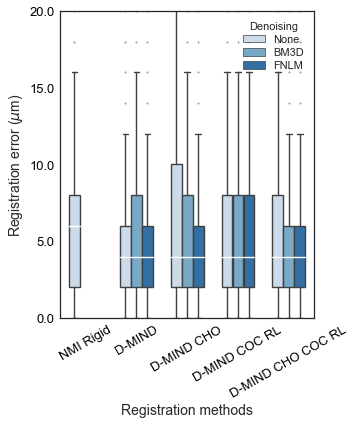

In [6]:
ystep, ymin, ymax =0.005, 0.0, 0.02
figw,figh = 5, 6
font_size = 14
registration_error_boxplot(reg_error_df, main_folder, ystep, ymin, ymax, figw, figh ,font_size)

Ax lines length  78


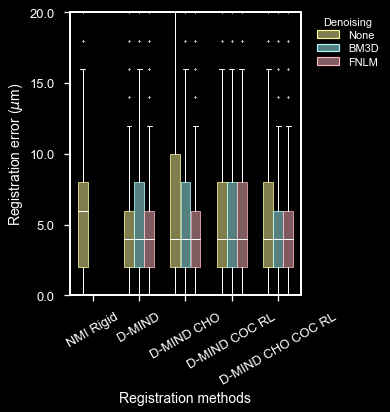

In [47]:
legend_loc= 'upper right'

registration_error_black_boxplot(reg_error_df, main_folder, ystep, ymin, ymax, figw, figh ,font_size, legend_loc)

In [6]:
main_folder = 'C:\\D\\dev\\data\\20170721_cc0001\\right'
feature_types = ['_mind', '_mind_cho','_mind_coc_rl', '_mind_cho_coc_rl']
denoise_methods = ['', '_bm3d', '_fnlm']

right_reg_error_df = read_registration_error(main_folder, denoise_methods, feature_types)

C:\D\dev\data\20170721_cc0001\right\distance_error.csv
   Registration error (mm)   Features Denoising
0                    0.006  NMI Rigid      None
1                    0.004  NMI Rigid      None
2                    0.000  NMI Rigid      None


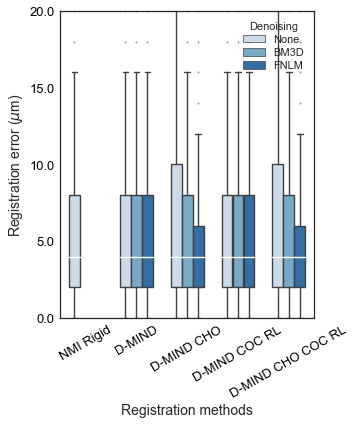

In [7]:
ystep, ymin, ymax =0.005, 0.0, 0.02
figw,figh = 5, 6
font_size = 14
registration_error_boxplot(right_reg_error_df, main_folder, ystep, ymin, ymax, figw, figh ,font_size)

In [8]:
feature_types = ['Rigid', 'MIND','MIND CHO', 'MIND COC RL', 'MIND CHO COC RL']
denoise_methods = ['None', 'BM3D', 'FNLM']

rigid_measure = reg_error_df.groupby('Features').get_group('NMI Rigid')
rigid_err = rigid_measure['Registration error (mm)']
mean = np.mean(rigid_err.tolist())
stdev = np.std(rigid_err.tolist())
median = np.percentile(rigid_err.tolist(), 50)
iqr = np.percentile(rigid_err.tolist(), 75) - np.percentile(rigid_err.tolist(), 25)
print('mean+-std: ({}+-{})'.format(mean, stdev))
print('median+-iqr: ({}+-{})'.format(median, iqr))

mean+-std: (nan+-nan)
median+-iqr: (nan+-nan)


C:\Users\Ja\Anaconda3\envs\aind\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [9]:
reg_error_df = reg_error_df.append(right_reg_error_df, ignore_index=True)
reg_error_df.head(5)

,Registration error (mm),Features,Denoising
0,0.020,NMI Rigid,None
1,0.014,NMI Rigid,None
2,0.016,NMI Rigid,None
3,0.022,NMI Rigid,None
4,0.016,NMI Rigid,None


IndexError: list index out of range

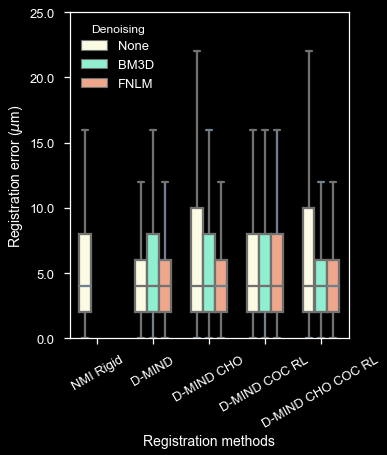

In [10]:
# combine left and right eyes
main_folder = 'C:\\D\\presentation\\presentation\\siemens2'
ystep, ymin, ymax =0.005, 0.0, 0.025
figw,figh = 5, 6
font_size = 14
registration_error_black_boxplot(reg_error_df, main_folder, ystep, ymin, ymax, figw, figh ,font_size, 'upper left')
#registration_error_boxplot(reg_error_df, main_folder, ystep, ymin, ymax, figw, figh ,font_size, 'upper left')

In [ ]:
np.arange(ymin, ymax+ystep, ystep)*1000.

In [ ]:
import csv

    
d_mind_demons = reg_error_df.groupby('Features').get_group('D-MIND')
reg_err = d_mind_demons['Registration error (mm)'].tolist()
#iqr = np.subtract(*np.percentile(error, [75, 25]))
#median = np.percentile(error, 50)
print(type(reg_err))
folder = 'C:\\D\\dev\\data\\20170721_cc0001'
filename = os.path.join(folder, 'd_mind_demons_reg_err.csv')
with open(filename, 'w') as outfile:
    wr = csv.writer(outfile)
    wr.writerow(reg_err)